# Text Mining with NLTK Library
----------
    + Data Preprocessing 
    + Create model with Logistic Regressing and XGBoost Algorithm

## Data Preprocessing 
---------

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn 
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
data_1 = pd.read_csv("C:\ARTIFICIAL INTELLIGENCE/03 - Machine Learning/01 - Resource/submission-sample.csv")

In [3]:
data_1.dropna(inplace=True)

In [4]:
data_2 = pd.read_csv("C:\ARTIFICIAL INTELLIGENCE/03 - Machine Learning/01 - Resource/test.csv")

In [5]:
data_2.dropna(inplace=True)

In [6]:
data_3 = pd.read_csv("C:\ARTIFICIAL INTELLIGENCE/03 - Machine Learning/01 - Resource/train.csv")

In [7]:
data_3.dropna(inplace=True)

In [8]:
data_1

,'id','isSpam'
0,311,False
1,312,False
2,313,False
3,314,False
4,315,False
...,...,...
296,607,False
297,608,False
298,609,True
299,610,True


In [9]:
data_2

,'id','text'
0,311,Dunno cos i was v late n when i reach they ins...
1,312,Guess who spent all last night phasing in and ...
2,313,So now my dad is gonna call after he gets out ...
3,314,Yes..but they said its IT.
4,315,"Very hurting n meaningful lines ever: ""I compr..."
...,...,...
296,607,This is wishing you a great day. Moji told me ...
297,608,Thanks again for your reply today. When is ur ...
298,609,Sorry I flaked last night
299,610,He said i look pretty wif long hair wat. But i...


In [10]:
data_ = pd.concat([data_2, data_1.iloc[:, 1]], axis=1)

In [11]:
data_

,'id','text','isSpam'
0,311.0,Dunno cos i was v late n when i reach they ins...,False
1,312.0,Guess who spent all last night phasing in and ...,False
2,313.0,So now my dad is gonna call after he gets out ...,False
3,314.0,Yes..but they said its IT.,False
4,315.0,"Very hurting n meaningful lines ever: ""I compr...",False
...,...,...,...
296,607.0,This is wishing you a great day. Moji told me ...,False
297,608.0,Thanks again for your reply today. When is ur ...,False
298,609.0,Sorry I flaked last night,True
299,610.0,He said i look pretty wif long hair wat. But i...,True


In [12]:
data_ = data_.loc[:, ["'text'", "'isSpam'"]]

In [13]:
data_

,'text','isSpam'
0,Dunno cos i was v late n when i reach they ins...,False
1,Guess who spent all last night phasing in and ...,False
2,So now my dad is gonna call after he gets out ...,False
3,Yes..but they said its IT.,False
4,"Very hurting n meaningful lines ever: ""I compr...",False
...,...,...
296,This is wishing you a great day. Moji told me ...,False
297,Thanks again for your reply today. When is ur ...,False
298,Sorry I flaked last night,True
299,He said i look pretty wif long hair wat. But i...,True


In [14]:
data_ = data_[:].values

In [15]:
data_ = pd.DataFrame(data=data_, columns=["text", "0 ==> real and 1 ==> spam"])

In [16]:
data_

,text,0 ==> real and 1 ==> spam
0,Dunno cos i was v late n when i reach they ins...,False
1,Guess who spent all last night phasing in and ...,False
2,So now my dad is gonna call after he gets out ...,False
3,Yes..but they said its IT.,False
4,"Very hurting n meaningful lines ever: ""I compr...",False
...,...,...
296,This is wishing you a great day. Moji told me ...,False
297,Thanks again for your reply today. When is ur ...,False
298,Sorry I flaked last night,True
299,He said i look pretty wif long hair wat. But i...,True


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
LE = LabelEncoder()

In [19]:
data_.iloc[:, 1] = LE.fit_transform(data_.iloc[:, 1])

In [20]:
data_

,text,0 ==> real and 1 ==> spam
0,Dunno cos i was v late n when i reach they ins...,0
1,Guess who spent all last night phasing in and ...,0
2,So now my dad is gonna call after he gets out ...,0
3,Yes..but they said its IT.,0
4,"Very hurting n meaningful lines ever: ""I compr...",0
...,...,...
296,This is wishing you a great day. Moji told me ...,0
297,Thanks again for your reply today. When is ur ...,0
298,Sorry I flaked last night,1
299,He said i look pretty wif long hair wat. But i...,1


In [21]:
data_3

,'id','type','text'
0,1,ham,Go until jurong point
1,2,ham,Ok lar... Joking wif u oni...'
2,3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,4,ham,U dun say so early hor... U c already then say...
4,5,ham,Nah I don't think he goes to usf
...,...,...,...
305,306,ham,No just send to you. Bec you in temple na.'
306,307,ham,You aren't coming home between class
307,308,spam,Hi if ur lookin 4 saucy daytime fun wiv busty ...
308,309,ham,S but mostly not like that.'


In [22]:
data_3 = pd.concat([data_3.iloc[:, 2], data_3.iloc[:, 1]], axis=1)

In [23]:
data_3

,'text','type'
0,Go until jurong point,ham
1,Ok lar... Joking wif u oni...',ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,Nah I don't think he goes to usf,ham
...,...,...
305,No just send to you. Bec you in temple na.',ham
306,You aren't coming home between class,ham
307,Hi if ur lookin 4 saucy daytime fun wiv busty ...,spam
308,S but mostly not like that.',ham


In [24]:
data_3.iloc[:, 1] = LE.fit_transform(data_3.iloc[:, 1])

In [25]:
data_3

,'text','type'
0,Go until jurong point,0
1,Ok lar... Joking wif u oni...',0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,Nah I don't think he goes to usf,0
...,...,...
305,No just send to you. Bec you in temple na.',0
306,You aren't coming home between class,0
307,Hi if ur lookin 4 saucy daytime fun wiv busty ...,1
308,S but mostly not like that.',0


In [26]:
data_3 = data_3[:].values

In [27]:
data_3 = pd.DataFrame(data= data_3, columns=["text", "0 ==> real and 1 ==> spam"])

In [28]:
data_3

,text,0 ==> real and 1 ==> spam
0,Go until jurong point,0
1,Ok lar... Joking wif u oni...',0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,Nah I don't think he goes to usf,0
...,...,...
304,No just send to you. Bec you in temple na.',0
305,You aren't coming home between class,0
306,Hi if ur lookin 4 saucy daytime fun wiv busty ...,1
307,S but mostly not like that.',0


In [29]:
data_

,text,0 ==> real and 1 ==> spam
0,Dunno cos i was v late n when i reach they ins...,0
1,Guess who spent all last night phasing in and ...,0
2,So now my dad is gonna call after he gets out ...,0
3,Yes..but they said its IT.,0
4,"Very hurting n meaningful lines ever: ""I compr...",0
...,...,...
296,This is wishing you a great day. Moji told me ...,0
297,Thanks again for your reply today. When is ur ...,0
298,Sorry I flaked last night,1
299,He said i look pretty wif long hair wat. But i...,1


In [30]:
data_ = data_[:].values

In [31]:
data_ = pd.DataFrame(data=data_, index=range(309, 610), columns=["text", "0 ==> real and 1 ==> spam"])

In [32]:
data = pd.concat([data_3, data_], axis=0)

In [33]:
data

,text,0 ==> real and 1 ==> spam
0,Go until jurong point,0
1,Ok lar... Joking wif u oni...',0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,Nah I don't think he goes to usf,0
...,...,...
605,This is wishing you a great day. Moji told me ...,0
606,Thanks again for your reply today. When is ur ...,0
607,Sorry I flaked last night,1
608,He said i look pretty wif long hair wat. But i...,1


<AxesSubplot:xlabel='0 ==> real and 1 ==> spam', ylabel='count'>

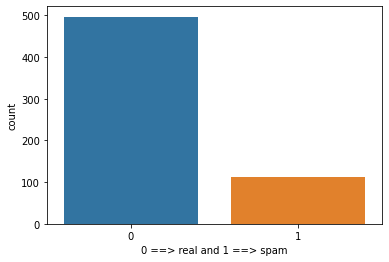

In [34]:
sbn.countplot(x="0 ==> real and 1 ==> spam", data=data)

----------

## Bag of Words
----

In [35]:
compile_ = []

In [36]:
ps = PorterStemmer()

In [37]:
for i in range(610):

    x = re.sub("[^a-zA-Z]", " ", str(data.iloc[:, 0][i]))
    x = x.lower().split()
    x = [ps.stem(word=word_) for word_ in x if not word_ is set(stopwords.words("english"))]
    x = " ".join(x)
    compile_.append(x)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
cv = CountVectorizer(max_features=100)

In [98]:
x = cv.fit_transform(compile_).toarray()
y = data.iloc[:, 1].values

In [99]:
x.shape

(610, 100)

In [100]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [102]:
import numpy as np

In [103]:
y = np.array(y).astype(int)

In [104]:
y.shape

(610,)

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 1)

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
sc = StandardScaler()

In [120]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [121]:
x_test_sc.shape

(204, 100)

In [122]:
x_train_sc.shape

(406, 100)

In [123]:
y_train.shape

(406,)

In [124]:
y_test.shape

(204,)

----------

## Navie Bayes Algorithm
------

In [125]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [126]:
gnb = GaussianNB()

In [127]:
gnm = MultinomialNB()

In [128]:
gnb.fit(x_train_sc, y_train)

GaussianNB()

In [130]:
gnm.fit(x_train, y_train)

MultinomialNB()

In [131]:
y_pred_gnb = gnb.predict(x_test_sc)

In [132]:
y_pred_gnm = gnm.predict(x_test_sc)

In [133]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [134]:
cr = classification_report(y_true=y_test, y_pred=y_pred_gnb)

C:\Users\90545\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
cr

'              precision    recall  f1-score   support\n\n           0       0.77      1.00      0.87       158\n           1       0.00      0.00      0.00        46\n\n    accuracy                           0.77       204\n   macro avg       0.39      0.50      0.44       204\nweighted avg       0.60      0.77      0.68       204\n'

In [136]:
cr = classification_report(y_true=y_test, y_pred=y_pred_gnm)

In [137]:
cr

'              precision    recall  f1-score   support\n\n           0       0.84      0.77      0.80       158\n           1       0.38      0.48      0.42        46\n\n    accuracy                           0.71       204\n   macro avg       0.61      0.63      0.61       204\nweighted avg       0.73      0.71      0.72       204\n'

In [138]:
cm = confusion_matrix(y_true = y_test, y_pred=y_pred_gnb)

In [139]:
cm

array([[158,   0],
       [ 46,   0]], dtype=int64)

In [140]:
cm = confusion_matrix(y_true = y_test, y_pred=y_pred_gnm)

In [141]:
cm

array([[122,  36],
       [ 24,  22]], dtype=int64)

In [142]:
ac = accuracy_score(y_true = y_test, y_pred = y_pred_gnb)

In [145]:
ac * 100

77.45098039215686

In [146]:
ac = accuracy_score(y_true = y_test, y_pred = y_pred_gnm)

In [147]:
ac

0.7058823529411765

-------

## XGBoost Algorithms
---------

In [148]:
from xgboost import XGBClassifier

In [149]:
xgboost = XGBClassifier()

In [150]:
xgboost.fit(x_train_sc, y_train)

C:\Users\90545\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[17:51:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
y_pred_ = pd.DataFrame(data = xgboost.predict(x_test_sc), columns=["Predict Y"])

In [154]:
y_test_ = pd.DataFrame(data=y_test, columns=["Real Y"])

In [155]:
x = pd.concat([y_test_, y_pred_], axis=1)

In [156]:
x

,Real Y,Predict Y
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
199,0,0
200,0,0
201,1,0
202,1,0


In [157]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [158]:
cm = confusion_matrix(y_true = y_test, y_pred=y_pred)

In [159]:
cm

array([[150,   8],
       [ 40,   6]], dtype=int64)

In [161]:
ac = accuracy_score(y_true = y_test, y_pred = y_pred)

In [162]:
ac

0.7647058823529411

---------

## K-NN
-----

In [163]:
from sklearn.neighbors  import KNeighborsClassifier

In [205]:
knn = KNeighborsClassifier(n_neighbors=3)

In [206]:
knn.fit(x_test_sc, y_test)

KNeighborsClassifier(n_neighbors=3)

In [207]:
y_pred = knn.predict(x_test_sc)

In [208]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [209]:
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

In [210]:
cm

array([[154,   4],
       [ 29,  17]], dtype=int64)

In [211]:
ac = accuracy_score(y_true = y_test, y_pred = y_pred)

In [212]:
ac

0.8382352941176471

--------

## Logistic Regression
------

In [213]:
from sklearn.linear_model import LogisticRegression

In [214]:
lg = LogisticRegression()

In [215]:
lg.fit(x_train_sc, y_train)

LogisticRegression()

In [217]:
y_pred__ = lg.predict(x_test_sc)

In [218]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [219]:
cm = confusion_matrix(y_true = y_test, y_pred = y_pred__)

In [220]:
cm

array([[148,  10],
       [ 37,   9]], dtype=int64)

In [222]:
ac = accuracy_score(y_true = y_test, y_pred = y_pred__)

In [224]:
ac

0.7696078431372549